In [1]:
import nixio as nix

In [2]:
import nixworks

In [3]:
from nixworks import interactor

In [4]:
import requests

In [5]:
%matplotlib notebook

In [6]:
example_url = "https://gin.g-node.org/G-Node/nix-examples/raw/master/relacs_simulation/relacs_data.nix"
print("Dowloading example file from gin.g-node.org:")
r = requests.get(example_url, stream=True)
if r.status_code != requests.codes.ok:
    raise ValueError
read_bytes = 0
chunksize = 2**12
with open("relacs_data.nix", 'wb') as f:
    for chunk in r.iter_content(chunk_size=chunksize):
        read_bytes += len(chunk)
        print("Downloaded %i bytes" % read_bytes, end="\r")
        f.write(chunk)
    print("\nDownload succeeded!")

Dowloading example file from gin.g-node.org:
Downloaded 12289851 bytes
Download succeeded!


In [7]:


nf = nix.File.open('relacs_data.nix', nix.FileMode.ReadOnly)
blk = nf.blocks[0]
da_li = [blk.data_arrays[0], blk.data_arrays[1]]



<IPython.core.display.Javascript object>


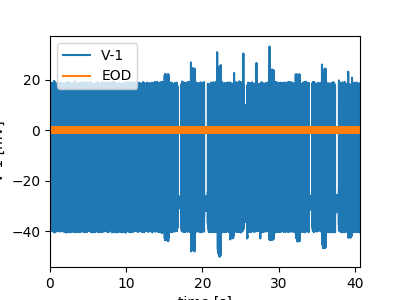

In [8]:
playground = interactor.Interactor()  # Instantiate the Interactor object

In [9]:
p = playground.interact_da(da_li)  # Plot the data_arrays and interact with the graph!

Checkbox(value=True, description='V-1')

Checkbox(value=True, description='EOD')

Checkbox(value=True, description='Legends')

interactive(children=(Dropdown(description='tag', options=(None, Tag: {name = BaselineActivity_1, type = relac…

FloatSlider(value=0.0, description='X axis start')

FloatSlider(value=40.68995, description='X axis end')

In [10]:
nf.close()